# Practice 1: Cross-Correlation Function (CCF)

## Preparation: download a synthetic solar-like stellar spectrum
PHOENIX synthetic spectral library: [https://phoenix.astro.physik.uni-goettingen.de/](https://phoenix.astro.physik.uni-goettingen.de/).

Paper: [https://www.aanda.org/articles/aa/abs/2013/05/aa19058-12/aa19058-12.html](https://www.aanda.org/articles/aa/abs/2013/05/aa19058-12/aa19058-12.html)

The synthetic spectra cover the wavelength range from 500 Å to 5.5 μm with resolutions of 
- R = 500,000 in the optical and near IR
- R = 100,000 in the IR 
- Δλ = 0.1 Å in the UV.

In [1]:
%pylab inline
rcParams.update({"font.size":25})

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'R=500000')

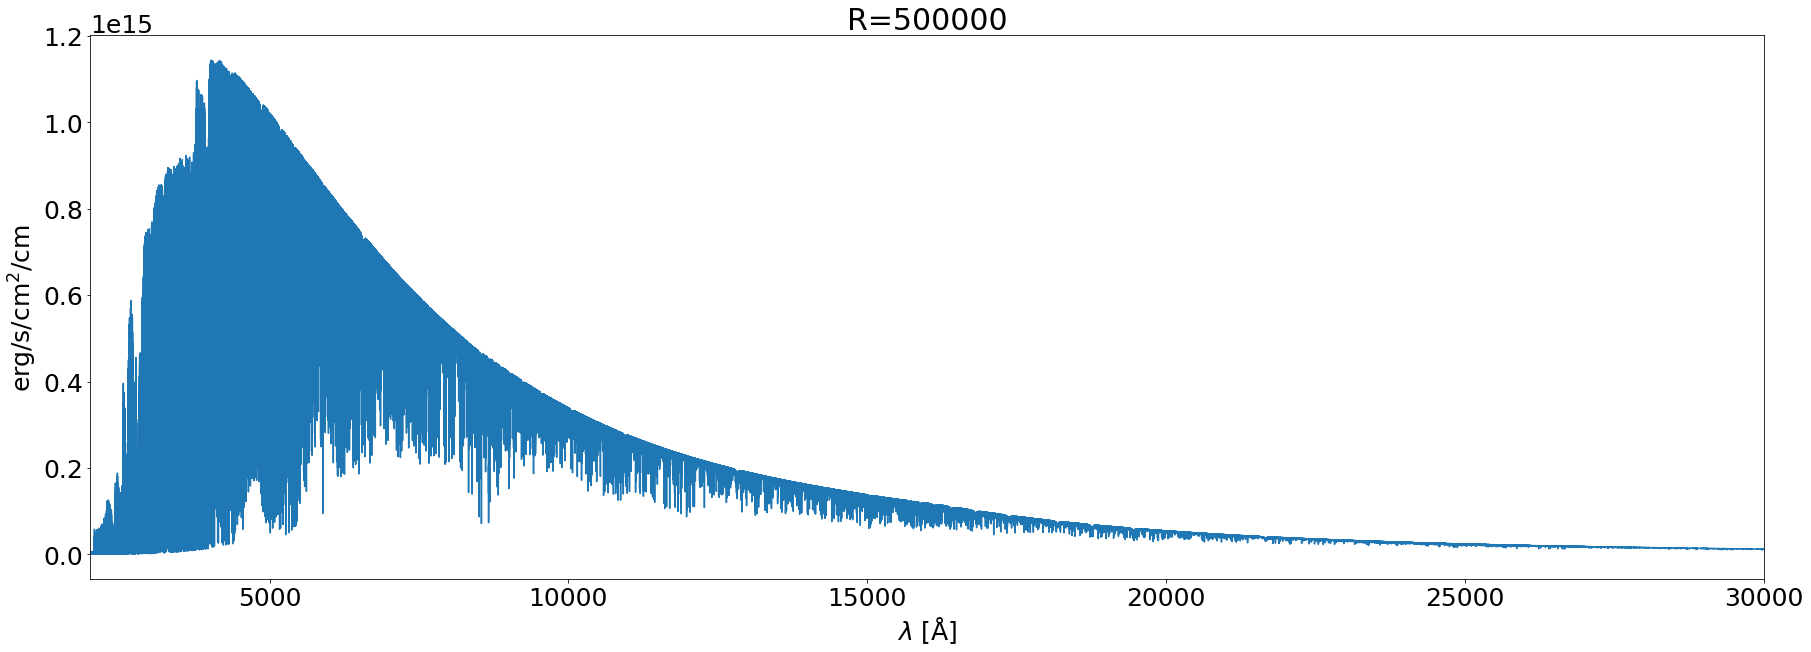

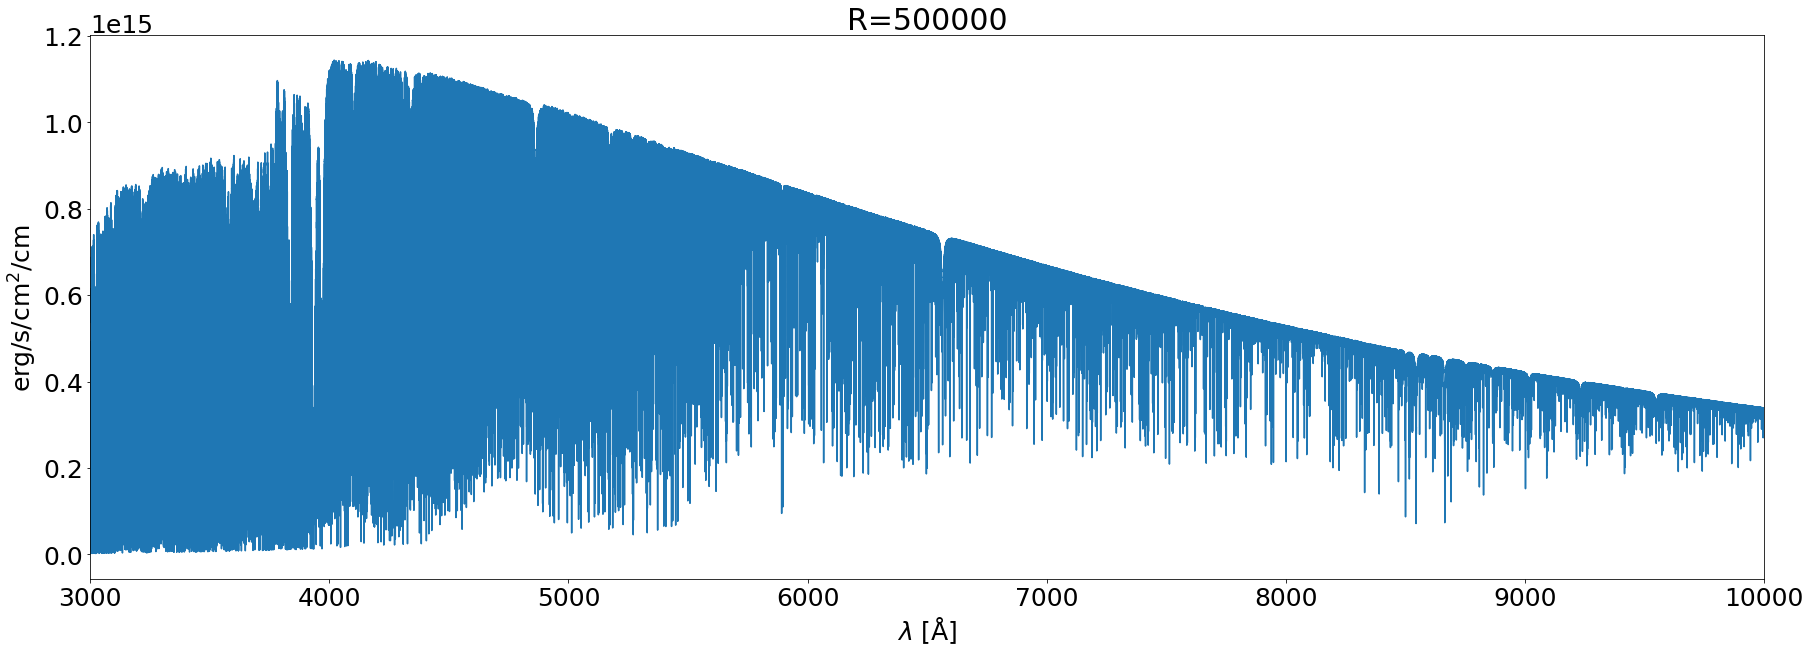

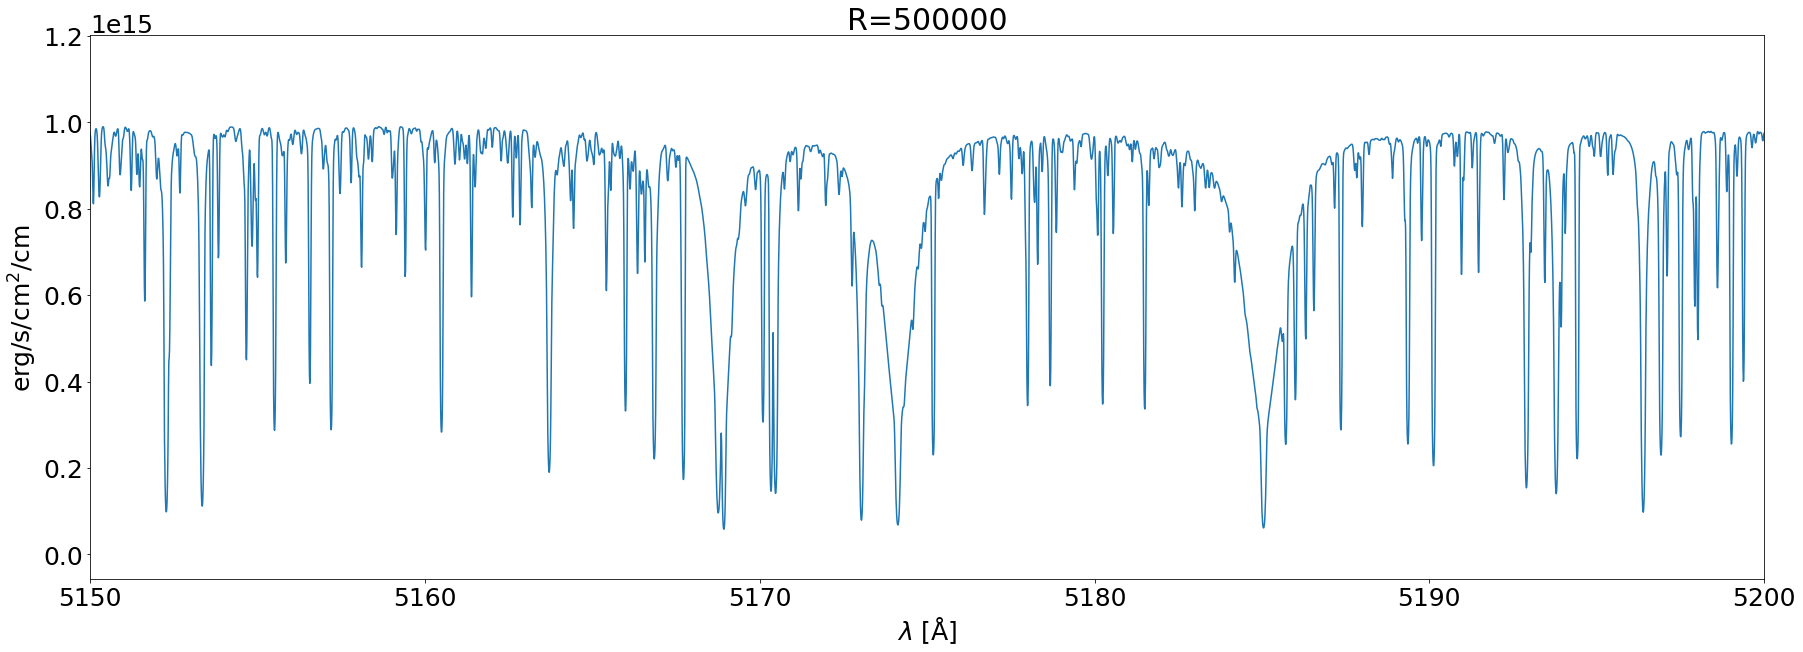

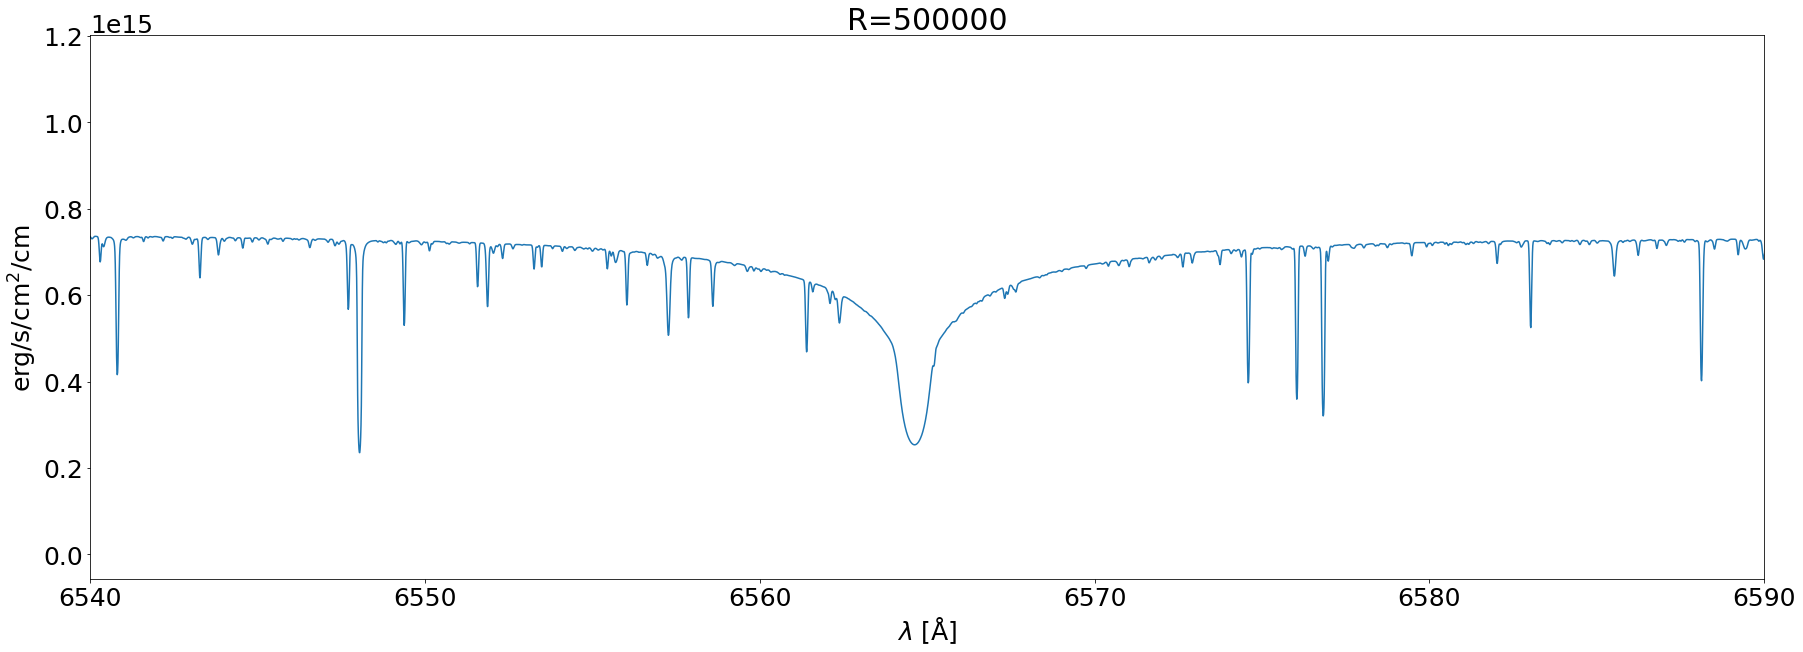

In [2]:
# read flux and wavelength arrays
from astropy.io import fits
flux_uh = fits.getdata("/Users/cham/Documents/slides/stellar_parameters/demo_ccf/lte05800-4.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")
wave_uh = fits.getdata("/Users/cham/Documents/slides/stellar_parameters/demo_ccf/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits")

# plot spectrum
figure(figsize=(30, 10))
plot(wave_uh, flux_uh)
xlim(2000, 30000)
xlabel("$\lambda$ [$\mathrm{\AA}$]")
ylabel("erg/s/cm$^2$/cm")
title("R=500000")

figure(figsize=(30, 10))
plot(wave_uh, flux_uh)
xlim(3000, 10000)
xlabel("$\lambda$ [$\mathrm{\AA}$]")
ylabel("erg/s/cm$^2$/cm")
title("R=500000")

figure(figsize=(30, 10))
plot(wave_uh, flux_uh)
xlim(5150, 5200)
xlabel("$\lambda$ [$\mathrm{\AA}$]")
ylabel("erg/s/cm$^2$/cm")
title("R=500000")

figure(figsize=(30, 10))
plot(wave_uh, flux_uh)
xlim(6540, 6590)
xlabel("$\lambda$ [$\mathrm{\AA}$]")
ylabel("erg/s/cm$^2$/cm")
title("R=500000")

## Skill 1: degrade resolution `laspec.qconv.conv_Gaussian`

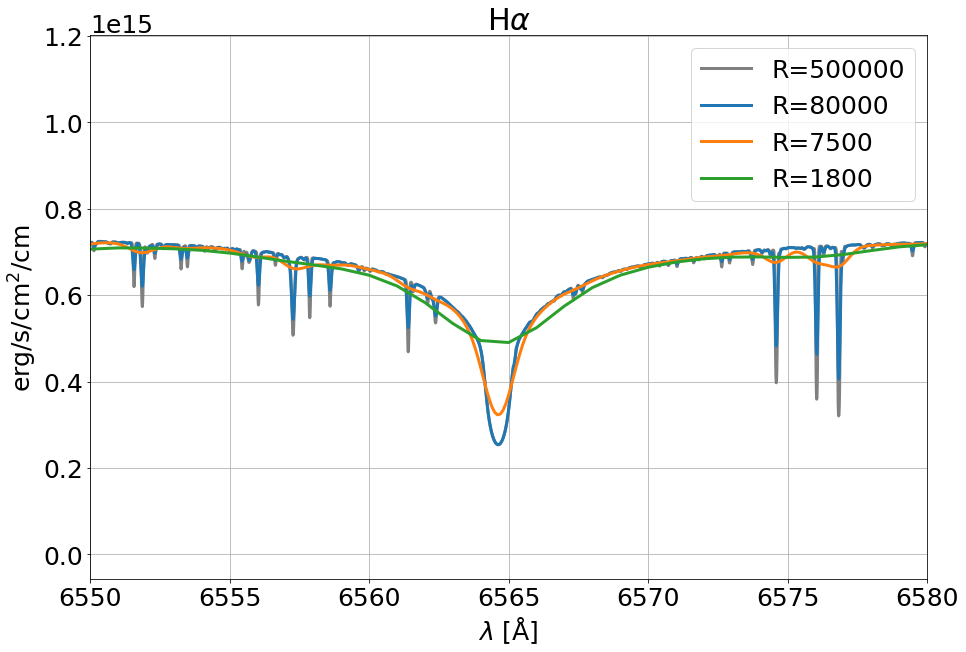

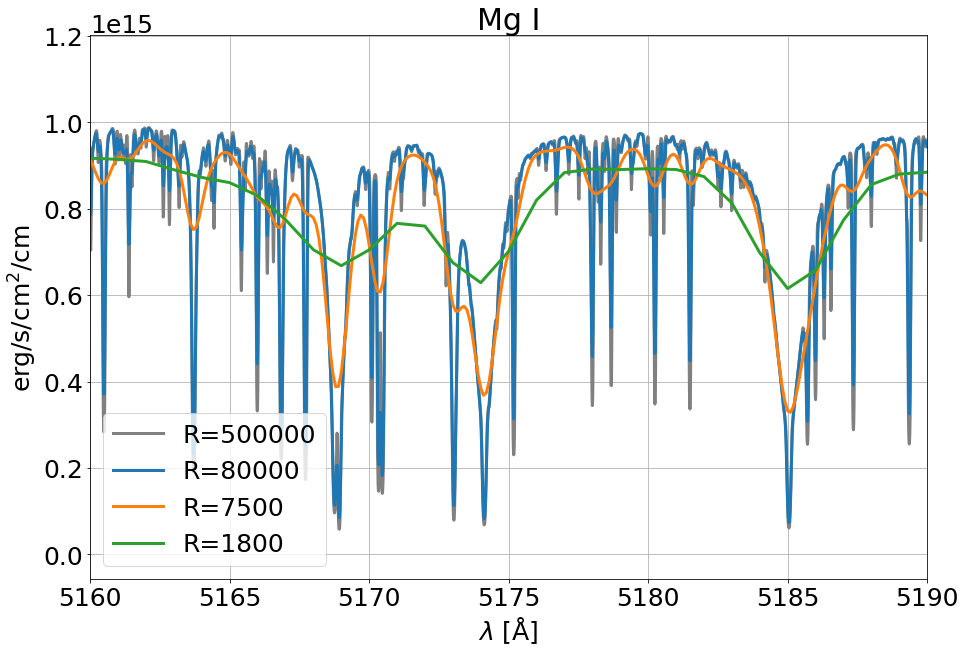

In [3]:
from laspec.qconv import conv_spec_Gaussian
wave_hi, flux_hi = conv_spec_Gaussian(wave_uh, flux_uh, R_hi=500000, R_lo=80000, wave_new=np.arange(3000, 10000, .01))
wave_me, flux_me = conv_spec_Gaussian(wave_uh, flux_uh, R_hi=500000, R_lo=7500, wave_new=np.arange(3000, 10000, .1))
wave_lo, flux_lo = conv_spec_Gaussian(wave_uh, flux_uh, R_hi=500000, R_lo=1800, wave_new=np.arange(3000, 10000, 1))

figure(figsize=(15, 10))
plot(wave_uh, flux_uh, lw=3, label="R=500000", c="gray")
plot(wave_hi, flux_hi, lw=3, label="R=80000")
plot(wave_me, flux_me, lw=3, label="R=7500")
plot(wave_lo, flux_lo, lw=3, label="R=1800")
xlim(6550, 6580)
xlabel("$\lambda$ [$\mathrm{\AA}$]")
ylabel("erg/s/cm$^2$/cm")
title("H$\\alpha$")
legend()
grid(True)

figure(figsize=(15, 10))
plot(wave_uh, flux_uh, lw=3, label="R=500000", c="gray")
plot(wave_hi, flux_hi, lw=3, label="R=80000")
plot(wave_me, flux_me, lw=3, label="R=7500")
plot(wave_lo, flux_lo, lw=3, label="R=1800")
xlim(5160, 5190)
xlabel("$\lambda$ [$\mathrm{\AA}$]")
ylabel("erg/s/cm$^2$/cm")
title("Mg I")
legend()
grid(True)

## Skill 2: make a fake observed stellar spectrum

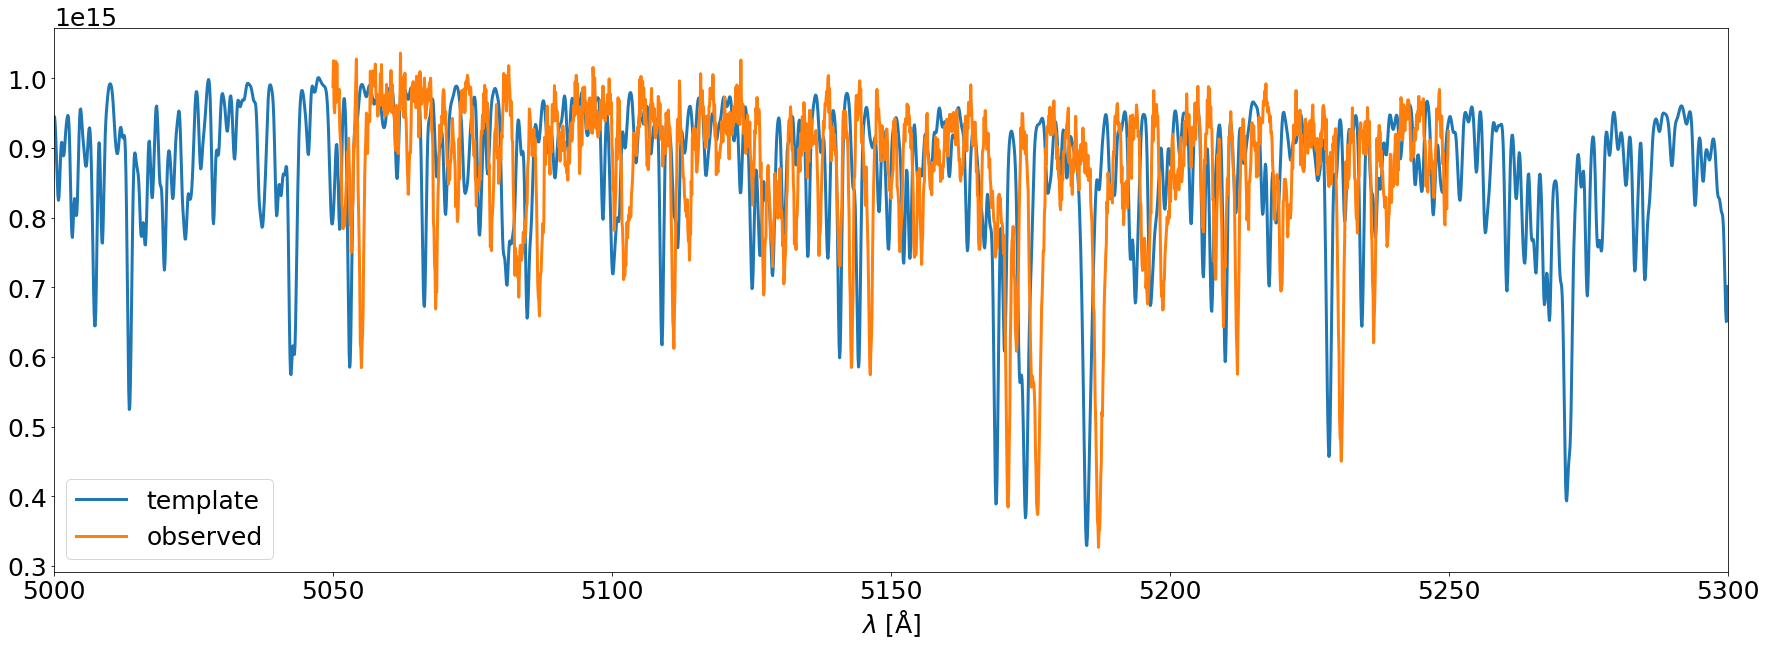

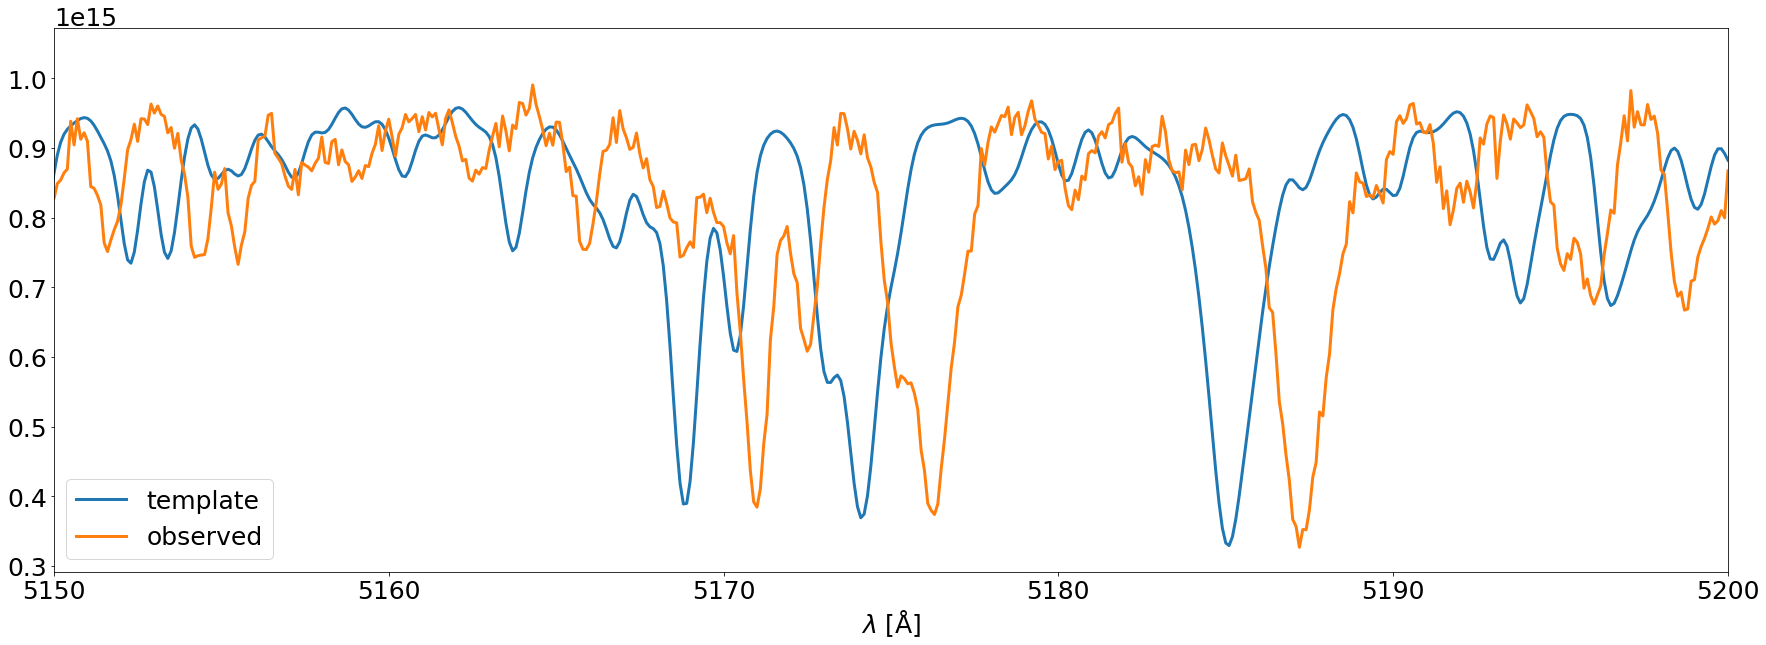

In [4]:
SNR = 50
RV = 123 # km/s

# convolve to R=7500
wave_temp, flux_temp = conv_spec_Gaussian(wave_hi, flux_hi, R_hi=500000, R_lo=7500, wave_new=np.arange(4900, 5500, .1))

# make a mock observed spectrum
wave_obs = np.arange(5050, 5250, 0.1)
flux_obs = np.interp(wave_obs, wave_temp*(1+RV/299792.458), flux_temp)
# add noise
flux_obs = np.random.normal(loc=flux_obs, scale=flux_obs/SNR)

figure(figsize=(30, 10))
plot(wave_temp, flux_temp, lw=3, label="template")
plot(wave_obs, flux_obs, lw=3, label="observed")
xlim(5000, 5300)
xlabel("$\lambda$ [$\mathrm{\AA}$]")
legend()

figure(figsize=(30, 10))
plot(wave_temp, flux_temp, lw=3, label="template")
plot(wave_obs, flux_obs, lw=3, label="observed")
xlim(5150, 5200)
xlabel("$\lambda$ [$\mathrm{\AA}$]")
legend()


## Skill 3: normalize a spectrum `laspec.normalization.normalize_spectrum_spline`

In [5]:
from laspec.normalization import normalize_spectrum_spline
flux_temp_norm, flux_temp_cont = normalize_spectrum_spline(wave_temp, flux_temp, niter=3)
flux_obs_norm, flux_obs_cont = normalize_spectrum_spline(wave_obs, flux_obs, niter=3)

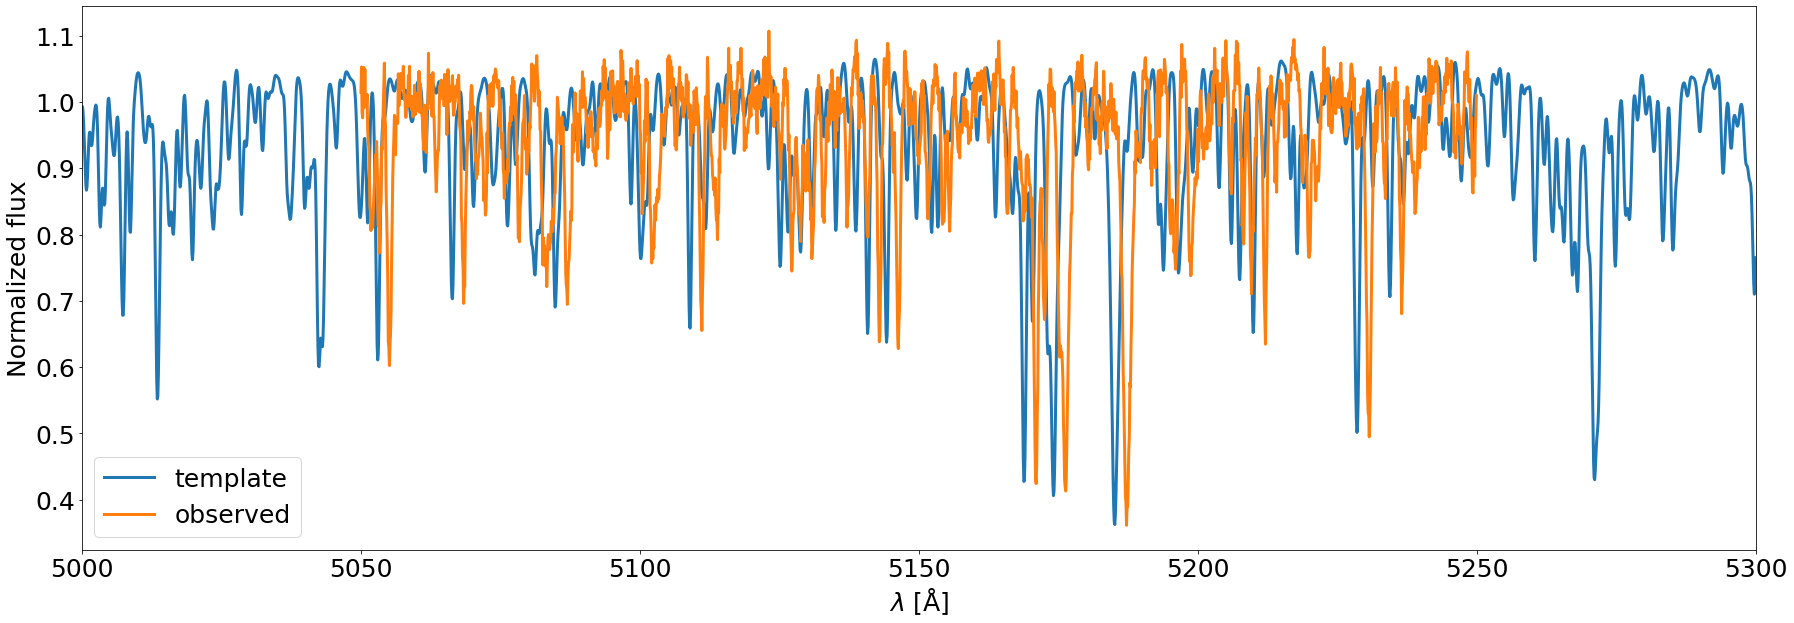

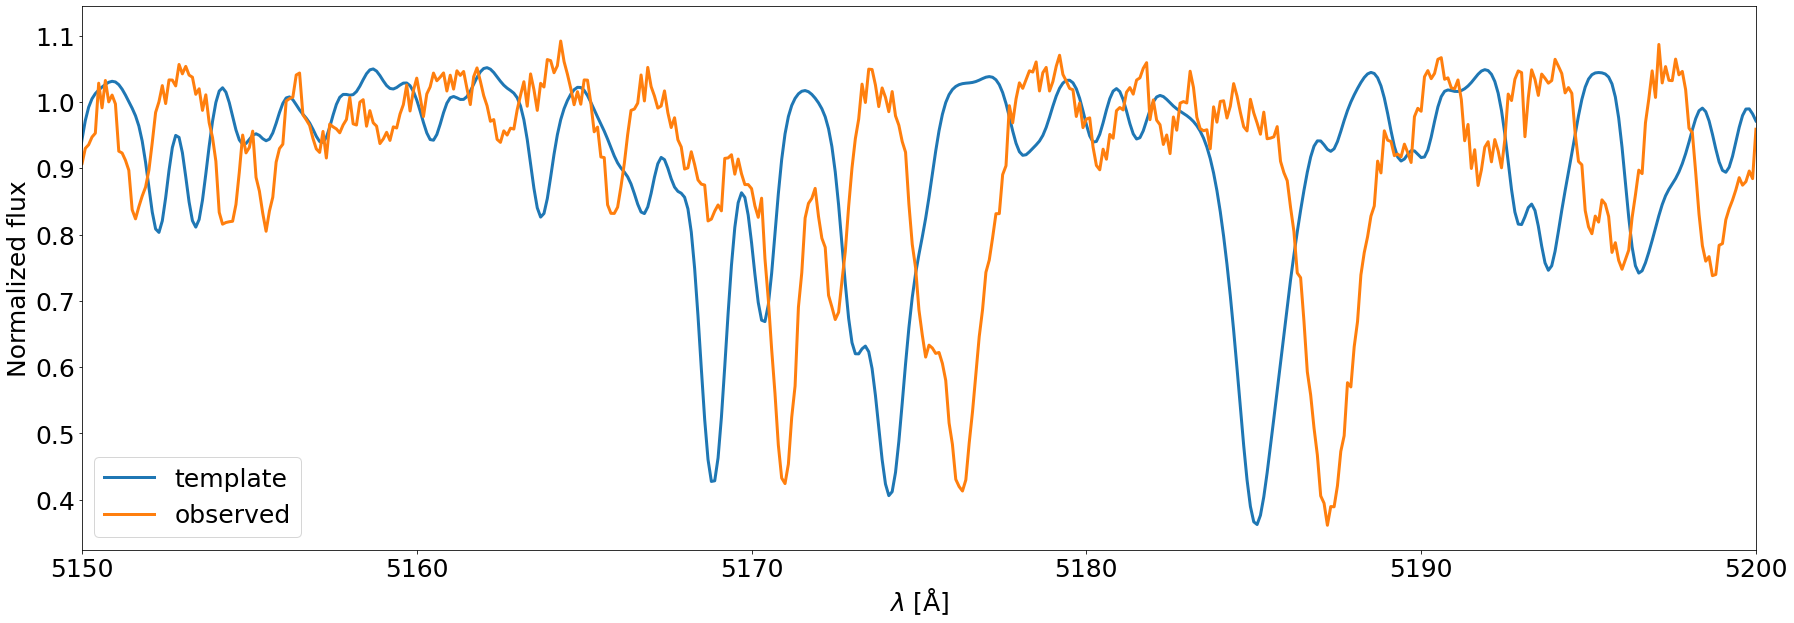

In [6]:
figure(figsize=(30, 10))
plot(wave_temp, flux_temp_norm, lw=3, label="template")
plot(wave_obs, flux_obs_norm, lw=3, label="observed")
xlim(5000, 5300)
xlabel("$\lambda$ [$\mathrm{\AA}$]")
ylabel("Normalized flux")
legend()

figure(figsize=(30, 10))
plot(wave_temp, flux_temp_norm, lw=3, label="template")
plot(wave_obs, flux_obs_norm, lw=3, label="observed")
xlim(5150, 5200)
xlabel("$\lambda$ [$\mathrm{\AA}$]")
ylabel("Normalized flux")
legend()

## Skill 4.1: evaluate Cross-Correlation Function (CCF) at a given RV `laspec.ccf.wxcorr_spec`

In [7]:
from laspec.ccf import wxcorr_spec
rv = 90.
wxcorr_spec(rv, wave_obs, flux_obs_norm, wave_temp, flux_temp_norm)

0.5554324131956456

## Skill 4.2: evaluate Cross-Correlation Function (CCF) at a given RV grid `laspec.ccf.wxcorr_rvgrid`

In [8]:
from laspec.ccf import wxcorr_rvgrid
rvgrid, ccf = wxcorr_rvgrid(wave_obs, flux_obs_norm, wave_temp, flux_temp_norm, rv_grid=np.linspace(-300, 500, 100))

Text(0, 0.5, 'CCF')

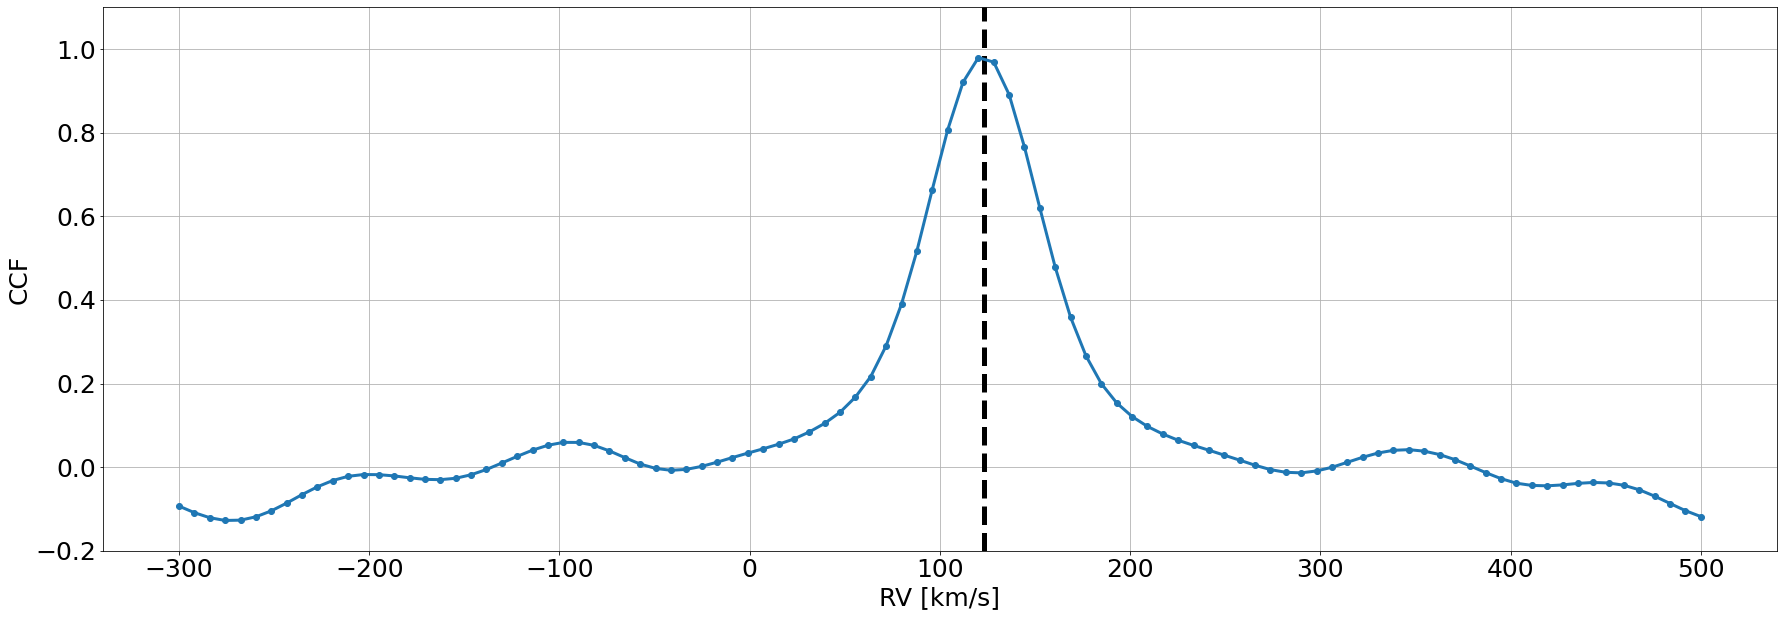

In [9]:
figure(figsize=(30, 10))
plot(rvgrid, ccf, 'o-', lw=3)
grid(True)
vlines(123, -0.2, 1.1, linestyle="--", color="k", lw=5)
ylim(-0.2, 1.1)
xlabel("RV [km/s]")
ylabel("CCF")

## Skill 5: estimate the radial velocity

In [10]:
# to be done